In [1]:
print("Hello Fairfax Consultants, Welcome Aboard")

Hello Fairfax Consultants, Welcome Aboard


In [2]:
#Import libraries

import pandas as pd
import numpy as np

In [3]:
#Import all sheet by index
df = pd.read_excel("E:\DAEN_690\Data\RawData_GMU_Summer2022.xlsx", sheet_name = None)#[0,1,2,3])
#pd.ExcelFile()
print(df)

{'Patient Demographics':         Patient_ID_Internal   PatientRace     PatientEthnicity  \
0                   1014525  HI Native/PI  Non-Hispanic/Latino   
1                   1625597         Asian  Non-Hispanic/Latino   
2                    818385         White  Non-Hispanic/Latino   
3                   1726959      Black/AA  Non-Hispanic/Latino   
4                   1319018         White  Non-Hispanic/Latino   
...                     ...           ...                  ...   
186860              1627319         Asian  Non-Hispanic/Latino   
186861              1016261      Black/AA  Non-Hispanic/Latino   
186862              1226587         White  Non-Hispanic/Latino   
186863              1326193         White  Non-Hispanic/Latino   
186864              1201794         White  Non-Hispanic/Latino   

                         Patient_Race_List_Raw PatientSex PatientGender  \
0       Native Hawaiian/Other Pacific Islander     Female        Female   
1                               

In [4]:
#Imported as Dictionary, view keys or values
print(df.keys())
print(df.values())
print(df['Patient Demographics']) #view 

dict_keys(['Patient Demographics', 'sepsis', 'STEMI', 'stroke'])
dict_values([        Patient_ID_Internal   PatientRace     PatientEthnicity  \
0                   1014525  HI Native/PI  Non-Hispanic/Latino   
1                   1625597         Asian  Non-Hispanic/Latino   
2                    818385         White  Non-Hispanic/Latino   
3                   1726959      Black/AA  Non-Hispanic/Latino   
4                   1319018         White  Non-Hispanic/Latino   
...                     ...           ...                  ...   
186860              1627319         Asian  Non-Hispanic/Latino   
186861              1016261      Black/AA  Non-Hispanic/Latino   
186862              1226587         White  Non-Hispanic/Latino   
186863              1326193         White  Non-Hispanic/Latino   
186864              1201794         White  Non-Hispanic/Latino   

                         Patient_Race_List_Raw PatientSex PatientGender  \
0       Native Hawaiian/Other Pacific Islander     Fem

In [5]:
#convert Dicationary to Data Frames
PatDemo = pd.DataFrame(df['Patient Demographics'])
SEPSIS = pd.DataFrame(df['sepsis'])
STEMI = pd.DataFrame(df['STEMI'])
STROKE = pd.DataFrame(df['stroke'])

#View Headings
print("\n PatDemo:\n",PatDemo.head(1))
print("\n SEPSIS:\n",SEPSIS.head(1))
print("\n STEMI:\n",STEMI.head(1))
print("\n STROKE:\n",STROKE.head(1))


 PatDemo:
    Patient_ID_Internal   PatientRace     PatientEthnicity  \
0              1014525  HI Native/PI  Non-Hispanic/Latino   

                    Patient_Race_List_Raw PatientSex PatientGender  \
0  Native Hawaiian/Other Pacific Islander     Female        Female   

  Patient_Gender_Raw  IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA  
0             Female                  0            0          50-59  

 SEPSIS:
   MonthYear  PtIDInternal            PrimaryImpression  isOutcomeFacility  \
0   2021-12       1780978  Infectious - Sepsis (A41.9)                  0   

  SepsisStatus                                              qSOFA  \
0        Alert  Altered Mental Status (GCS <15), Respiratory R...   

  EmergencyDepartmentDiagnosis HospitalDiagnosis  
0                          NaN               NaN  

 STEMI:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-03        875505  Respiratory - Acute Distress/ Breathing Diffic...   

   isO

In [6]:
#View Columns for each data frame

print("\n PatDemo:\n",PatDemo.columns)
print("\n SEPSIS:\n",SEPSIS.columns )
print("\n STEMI:\n",STEMI.columns )
print("\n STROKE:\n",STROKE.columns)


 PatDemo:
 Index(['Patient_ID_Internal', 'PatientRace', 'PatientEthnicity',
       'Patient_Race_List_Raw', 'PatientSex', 'PatientGender',
       'Patient_Gender_Raw', 'IsJuvenileUnder18', 'IsSenior65+',
       'AgeGroup_HIPAA'],
      dtype='object')

 SEPSIS:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'isOutcomeFacility',
       'SepsisStatus', 'qSOFA', 'EmergencyDepartmentDiagnosis',
       'HospitalDiagnosis'],
      dtype='object')

 STEMI:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'isOutcomeFacility',
       'STEMIstatus', 'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis'],
      dtype='object')

 STROKE:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'isOutcomeFacility',
       'StrokeStatus', 'Speech', 'FacialDroop', 'PronatorArmDrift',
       'LargeVesselOcclusionScreen', 'EmergencyDepartmentDiagnosis',
       'Hospit

In [7]:
#rename patient demographic column 'Patient_ID_Internal' to 'PtIDInternal'
PatDemo.rename(columns = {'Patient_ID_Internal':'PtIDInternal'}, inplace = True)

In [16]:
# merging the files how='inner' by default.
PdmSEPSIS = pd.merge(PatDemo,SEPSIS, on='PtIDInternal') 
PdmSEPSIS 
#Write as .csv
PdmSEPSIS.to_excel("E:\DAEN_690\Data\PdmSEPSIS.xlsx",sheet_name='SEPSIS' , index=False)


In [17]:
# merging the files how='inner' by default.
PdmSTEMI = pd.merge(PatDemo,STEMI, on='PtIDInternal') 
PdmSTEMI
#Write as .csv
PdmSTEMI.to_excel("E:\DAEN_690\Data\PdmSTEMI.xlsx",sheet_name='STEMI' , index=False)

In [18]:
# merging the files how='inner' by default.
PdmSTROKE = pd.merge(PatDemo,STROKE, on='PtIDInternal') 
PdmSTROKE
#Write as .csv
PdmSTROKE.to_excel("E:\DAEN_690\Data\PdmSTROKE.xlsx",sheet_name='STROKE' , index=False)


In [11]:
# merging the files how='inner' by default.
#PdmMerged = pd.merge(PatDemo,SEPSIS,STEMI,STROKE, on='PtIDInternal') 
PdmMerged = PatDemo.merge(SEPSIS, on='PtIDInternal').merge(STEMI,on='PtIDInternal').merge(STROKE,on='PtIDInternal')
PdmMerged 

,PtIDInternal,PatientRace,PatientEthnicity,Patient_Race_List_Raw,PatientSex,PatientGender,Patient_Gender_Raw,IsJuvenileUnder18,IsSenior65+,AgeGroup_HIPAA,...,MonthYear,PrimaryImpression,isOutcomeFacility,StrokeStatus,Speech,FacialDroop,PronatorArmDrift,LargeVesselOcclusionScreen,EmergencyDepartmentDiagnosis,HospitalDiagnosis
0,1585129,Asian,Non-Hispanic/Latino,Asian,Male,Male,Male,0,1,80-89,...,2021-06,Neuro - Stroke/CVA (I63.9),1,Alert,Normal,Left,NaN,NaN,NaN,"Sepsis, unspecified organism (A41.9), ""Non-ST ..."
1,1389021,None Listed,Hispanic/Latino,Hispanic or Latino,Male,Male,Male,0,0,40-49,...,2020-11,Behavioral - Mental Disorder Not Otherwise Lis...,1,None,NaN,NaN,NaN,NaN,NaN,"Cerebral infarction, unspecified (I63.9), ""Acu..."
2,1600193,Black/AA,Non-Hispanic/Latino,Black or African American,Male,Male,Male,0,1,70-79,...,2021-07,Neuro - Altered Mental Status / Level of Consc...,1,None,NaN,NaN,NaN,NaN,NaN,Non-ST elevation (NSTEMI) myocardial infarctio...
3,1269781,White,Non-Hispanic/Latino,White,Male,Male,Male,0,0,50-59,...,2020-06,Neuro - Altered Mental Status / Level of Consc...,1,Alert,Normal,Normal,Normal,Negative,NaN,"Acute kidney failure, unspecified (N17.9), ""Hy..."


In [19]:
df4 = pd.merge(pd.merge(PatDemo,SEPSIS,on='PtIDInternal'),pd.merge(STEMI,STROKE,on='PtIDInternal'))
print(df4)
#Write as .csv
df4.to_excel("E:\DAEN_690\Data\RepeatingPat.xlsx",sheet_name='RepeatingPat' , index=False)

   PtIDInternal  PatientRace     PatientEthnicity      Patient_Race_List_Raw  \
0       1585129        Asian  Non-Hispanic/Latino                      Asian   
1       1389021  None Listed      Hispanic/Latino         Hispanic or Latino   
2       1600193     Black/AA  Non-Hispanic/Latino  Black or African American   
3       1269781        White  Non-Hispanic/Latino                      White   

  PatientSex PatientGender Patient_Gender_Raw  IsJuvenileUnder18  IsSenior65+  \
0       Male          Male               Male                  0            1   
1       Male          Male               Male                  0            0   
2       Male          Male               Male                  0            1   
3       Male          Male               Male                  0            0   

  AgeGroup_HIPAA  ... MonthYear_y  \
0          80-89  ...     2021-06   
1          40-49  ...     2020-11   
2          70-79  ...     2021-07   
3          50-59  ...     2020-06   

       

In [21]:
PdmSTEMI.columns

Index(['PtIDInternal', 'PatientRace', 'PatientEthnicity',
       'Patient_Race_List_Raw', 'PatientSex', 'PatientGender',
       'Patient_Gender_Raw', 'IsJuvenileUnder18', 'IsSenior65+',
       'AgeGroup_HIPAA', 'MonthYear', 'PrimaryImpression', 'isOutcomeFacility',
       'STEMIstatus', 'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis'],
      dtype='object')

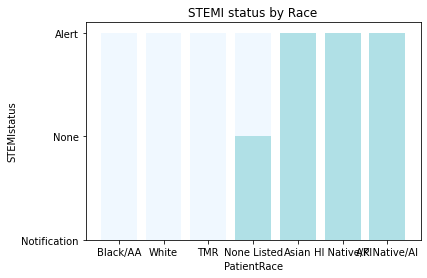

In [32]:
import matplotlib.pyplot as plt

#Creating the bar chart 
plt.bar(PdmSTEMI['PatientRace'],PdmSTEMI['STEMIstatus'],color = ['#F0F8FF','#B0E0E6']) #'#E6E6FA',

#Adding the aesthetics
plt.title('STEMI status by Race')
plt.xlabel('PatientRace')
plt.ylabel('STEMIstatus') 

#Show the plot
plt.show()

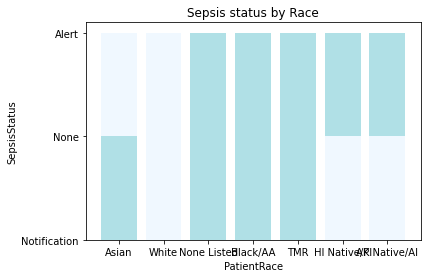

In [34]:
import matplotlib.pyplot as plt

#Creating the bar chart 
plt.bar(PdmSEPSIS['PatientRace'],PdmSEPSIS['SepsisStatus'],color = ['#F0F8FF','#B0E0E6']) #'#E6E6FA',

#Adding the aesthetics
plt.title('Sepsis status by Race')
plt.xlabel('PatientRace')
plt.ylabel('SepsisStatus') 

#Show the plot
plt.show()

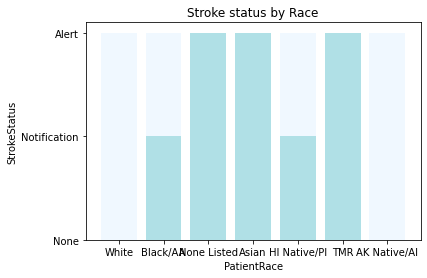

In [35]:
import matplotlib.pyplot as plt

#Creating the bar chart 
plt.bar(PdmSTROKE['PatientRace'],PdmSTROKE['StrokeStatus'],color = ['#F0F8FF','#B0E0E6']) #'#E6E6FA',

#Adding the aesthetics
plt.title('Stroke status by Race')
plt.xlabel('PatientRace')
plt.ylabel('StrokeStatus') 

#Show the plot
plt.show()